In [2]:
from astropy.io import fits
import numpy as np
from os.path import join
from numpy import random
from scipy.integrate import simps

bN=5000

h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
cut=0 #cutting at 1000 means ~2 eV==6200 A
#Darray=["15","18","21"]
#garray=["1.5","2"]
#xiarray=["2","3","3.7"]
Darray=["18"]
garray=["2"]
xiarray=["3"]

energy=[]
flux=[]

#for density in Darray:


for density in Darray:
    for gamma in garray:
        for logxi in xiarray:
            print(density,gamma,logxi)
            datype="g{}/n{}_logxi_{}".format(gamma,density,logxi)
            #datype="n{}_logxi_{}".format(density,logxi)
            rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2/ktbb01/",datype)
            specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)

            if len(specE2)>10*bN:
                ite=14
            else:
                ite=0
            skip=(bN+2)*ite

            specE2=np.loadtxt(join(rpath,"current/intensity"),usecols=0,max_rows=bN,skiprows=skip)
            foutE2=np.loadtxt(join(rpath,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)

            ind=foutE2<0
            foutE2[ind]=0
            
            fbin=[]
            for i in range(bN-1):
                fbin.append(simps(foutE2[i:i+2],specE2[i:i+2]*eV))
            energy.append(specE2[cut:4999]/1000)
            flux.append(fbin[cut:4999]/specE2[cut:4999]/eV)
    


18 2 3


In [6]:
simps(foutE2[3000:3500],specE2[3000:3500]*eV)

2.2033737608243855e+19

In [91]:
fact=1.8e19/1e-11
print(fact)

1.8e+30


In [92]:
simps(tarray[0],tarray[1]/1e35)

3.669517463049766e-38

In [93]:
tarray=np.array([np.ravel(energy),np.ravel(flux)/fact])
np.savetxt("/disk/bifrost/yuanze/my_work/xray/xrism/proposal/run/myspec.dat",tarray.T)

In [174]:
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
from astropy.io import fits as pyfits

density="18"
logxi="3"

AllModels.setEnergies("1e-4 1000. 5000 log")
mpath="/disk/bifrost/yuanze/software/table_generator/Xillver3_5_v3.fits"
# Define the Model
m1 = Model("atable{%s}"%mpath)


m1(1).values = "{}".format(density)      # Xillver3_5_v3 density
m1(2).values = "2."     # Xillver3_5_v3   gamma
m1(3).values = "{}".format(logxi)      # Xillver3_5_v3   logxi

datype="n{}_logxi_{}".format(density,logxi)
bN=5000
skip=14*(bN+2)
rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2/ktbb01/g2/",datype)
specE=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE=np.loadtxt(join(rpath3,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)

Plot.xAxis = "keV"
Plot("eemo")

xm=Plot.x(1)
ym=Plot.model(1)





Models will now use energy array created from:
   0.0001 - 1000   5000 log bins


Fit statistic  : C-Statistic              7.493257e+34     using 724 bins.

Test statistic : Chi-Squared              7.805219e+64     using 724 bins.
 Null hypothesis probability of 0.000000e+00 with 720 degrees of freedom
 Current data and model not fit yet.

Model atable{/disk/bifrost/yuanze/software/table_generator/Xillver3_5_v3.fits}<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   Xillver3.5_nlogn                15.0000      +/-  0.0          
   2    1   Xillver3.5_nGamma               2.00000      +/-  0.0          
   3    1   Xillver3.5_nlogxi               3.00000      +/-  0.0          
   4    1   Xillver3.5_nz                   0.0          frozen
   5    1   Xillver3.5_nnorm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.

(1e+25, 1e+30)

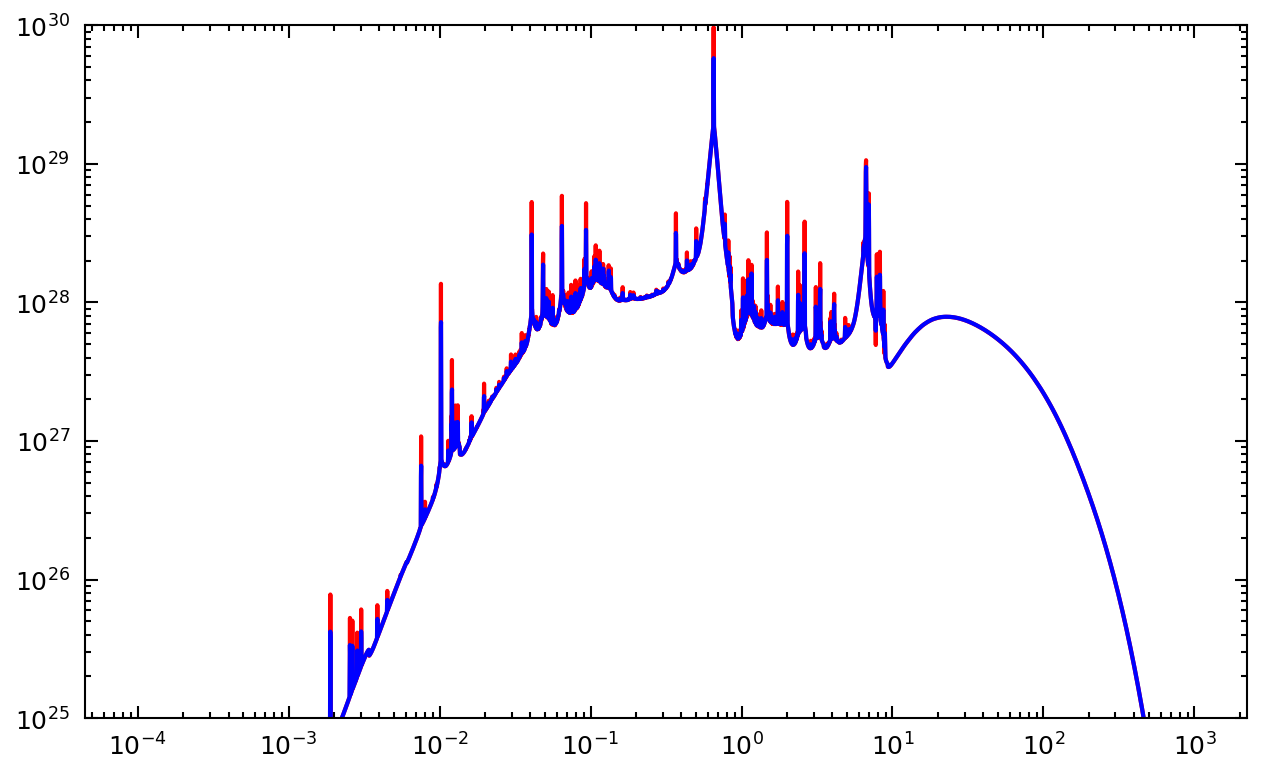

In [175]:
fig,axs=plt.subplots(figsize=(5,3),dpi=300)
axs.plot(specE/1e3,foutE*specE/1e3,"r")
axs.plot(xm,ym,"b")
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_ylim([1e25,1e30])

(0.0001, 100)

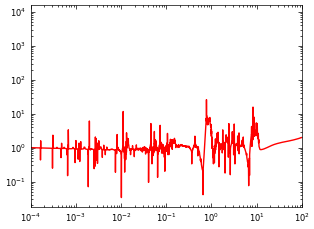

In [172]:
plt.plot(specE/1e3,ym/foutE,"r")
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-4,100])
#plt.ylim([1e-4,100])

In [130]:
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
from astropy.io import fits as pyfits

density="18"
logxi="3"
Plot.xAxis = "keV"
os.chdir("/disk/bifrost/yuanze/my_work/xray/xrism/proposal/run/output")

Xset.restore("/disk/bifrost/yuanze/my_work/xray/xrism/proposal/run/output/test.xcm")
#datype="n{}_logxi_{}".format(density,logxi)

#mpath="/disk/bifrost/yuanze/software/table_generator/Xillver3_5_v3.fits"
# Define the Model
#m1 = Model("atable{%s}"%mpath)


#m1(1).values = "{}".format(density)      # Xillver3_5_v3 density
#m1(2).values = "2."     # Xillver3_5_v3   gamma
#m1(3).values = "{}".format(logxi)      # Xillver3_5_v3   logxi

#Fit.renorm()

#bN=5000
#skip=14*(bN+2)
#rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2/ktbb01/g2/",datype)
#specE=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutE=np.loadtxt(join(rpath3,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
AllModels.setEnergies("1e-3 1000. 5000 log")
Plot.setRebin(minSig=6,maxBins=1000,groupNum=-1,errType="quad")
Plot("euf emo")

x=Plot.x(1,plotWindow=1)
y=Plot.y(1,plotWindow=1)
yerr=Plot.yErr(1,plotWindow=1)

xm=Plot.x(1,plotWindow=2)
ym=Plot.model(1,plotWindow=2)


Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/my_work/xray/xrism/proposal/run/output/test.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.



Fit statistic  : Chi-Squared                 2038.81     using 724 bins.

Test statistic : Chi-Squared                 2038.81     using 724 bins.
 Null hypothesis probability of 1.56e-126 with 719 degrees of freedom
 Current data and model not fit yet.
***Warning: spectrum TELESCOPE keyword (HITOMI) is not consistent with that from background/correction file (XRISM).
***Warning: spectrum INSTRUMENT keyword (SXS) is not consistent with that from background/correction file (RESOLVE).

Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: cold_grp.pi  Spectrum 1
Net cou

In [132]:
AllModels.lmod("relxill", dirPath="/disk/bifrost/yuanze/software/relxill")
Xset.restore("/disk/bifrost/yuanze/my_work/xray/xrism/proposal/run/output/old_xillver.xcm")
#Plot.setRebin(minSig=6,maxBins=1000,groupNum=-1,errType="quad")
Plot("euf emo del")

#x=Plot.x(1,plotWindow=1)
#y=Plot.y(1,plotWindow=1)
#yerr=Plot.yErr(1,plotWindow=1)

xm2=Plot.x(1,plotWindow=2)
ym2=Plot.model(1,plotWindow=2)

xra=Plot.x(1,plotWindow=3)
yra=Plot.y(1,plotWindow=3)
yraerr=Plot.yErr(1,plotWindow=3)

Model package relxill successfully loaded.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  922.05     using 724 bins.

Test statistic : Chi-Squared                  864.73     using 724 bins.
 Null hypothesis probability of 1.58e-04 with 720 degrees of freedom
 Current data and model not fit yet.
***Warning: spectrum TELESCOPE keyword (HITOMI) is not consistent with that from background/correction file (XRISM).
***Warning: spectrum INSTRUMENT keyword (SXS) is not consistent with that from background/correction file (RESOLVE).

Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: cold_grp.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.834e-01 +/- 1.40
***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/my_work/xray/xrism/proposal/run/output/old_xillver.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only 

In [29]:
from astropy.io import fits
import numpy as np
from os.path import join
from numpy import random
from scipy.integrate import simps

bN=5000

h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
cut=0 #cutting at 1000 means ~2 eV==6200 A
Darray=["15","18","20"]
xiarray=["3"]

energy=[]
flux=[]

#for density in Darray:


for density in Darray:
    for logxi in xiarray:
        print(density,logxi)
        datype="g2/n{}_logxi_{}".format(density,logxi)
        rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified/ktbb01/",datype)
        specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)

        if len(specE2)>14*bN:
            ite=14
        else:
            ite=0
        skip=(bN+2)*ite

        specE2=np.loadtxt(join(rpath,"current/intensity"),usecols=0,max_rows=bN,skiprows=skip)
        foutE2=np.loadtxt(join(rpath,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)

        ind=foutE2<0
        foutE2[ind]=0

        fbin=[]
        for i in range(bN-1):
            fbin.append(simps(foutE2[i:i+2],specE2[i:i+2]*eV))
        energy.append(specE2[cut:4999]/1000)
        flux.append(fbin[cut:4999])
tarray=np.array([np.ravel(energy),np.ravel(flux)])
np.savetxt("/disk/bifrost/yuanze/example_Yuanze/mytest_2.out",tarray.T)

15 3
18 3
20 3


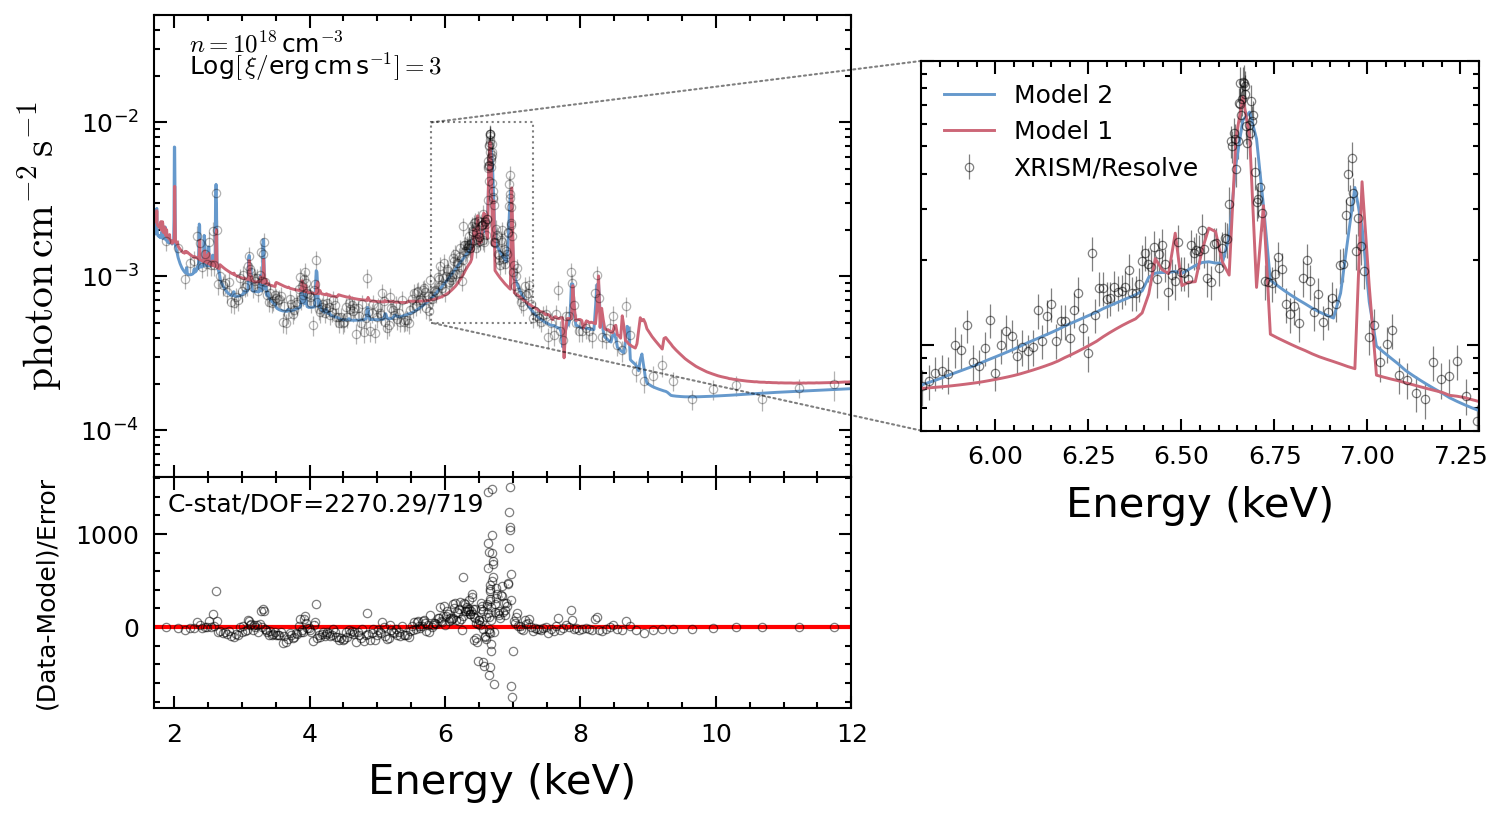

In [137]:
#Ploting spectra for publication
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":6,
"legend.fancybox":True})

lw=0.7
numrow=2
numcol=1
colorlst=["#CC6677","#88CCEE","#6699CC"]
fig=plt.figure(figsize=(3,3),dpi=300)
gs = fig.add_gridspec(numrow, numcol,height_ratios=[2,1],hspace=0.0)
axs=gs.subplots(sharex=True)

find=foutE2<0
foutE2[find]=0.

axs[0].errorbar(x,y,yerr=yerr,fmt="ko",mfc="none",mew=0.3,ms=2,lw=0.3,alpha=0.3,label="XRISM/Resolve")
axs[0].plot(xm,ym,color=colorlst[2],ms=0.5,label="Model 2",lw=lw)
axs[0].plot(xm2,ym2,color=colorlst[0],ms=0.5,label="Model 1",lw=lw)
#axs.set_xscale("log")
axs[1].errorbar(xra,yra,yerr=yraerr,fmt="ko",mfc="none",mew=0.3,ms=2,lw=0.3,alpha=0.5,label="XRISM/Resolve")

axs[1].set_ylabel("(Data-Model)/Error")
axs[1].text(0.02,0.85,r"C-stat/DOF=2270.29/719",transform=axs[1].transAxes)
#axs[1].set_ylim([0,7.5])
axs[1].axhline(1,color="r")
axs[0].set_yscale("log")
axs[1].set_xlabel("Energy (keV)",fontsize=10)
axs[0].set_ylabel(r"$\rm photon\,cm^{-2}\,s^{-1}$",fontsize=10)
axs[0].set_xlim([1.7,12])
axs[0].set_ylim([5e-5,5e-2])
#plt.axvline(x=)
#axs=plt.gca()
axs[0].text(0.05,0.92,r"$n=10^{%s}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%s $"%logxi,transform=axs[0].transAxes)


axins=axs[0].inset_axes([1.1,0.1,0.8,0.8])
axins.errorbar(x,y,yerr=yerr,fmt="ko",mfc="none",mew=0.3,ms=2,lw=0.3,alpha=0.5,label="XRISM/Resolve")
axins.plot(xm,ym,color=colorlst[2],ms=0.5,label="Model 2",lw=lw)
axins.plot(xm2,ym2,color=colorlst[0],ms=0.5,label="Model 1",lw=lw)

#axs[0].legend(loc='best')
axins.set_xlim([5.8,7.3])
axins.set_ylim([5e-4,1e-2])

#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)

axins.legend()
rec,clines=axs[0].indicate_inset_zoom(axins,edgecolor="k",ls=':',lw=0.5)
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')
clines[0].set_linewidth(0.5)
clines[1].set_linewidth(0.5)


plt.savefig("/disk/bifrost/yuanze/my_work/pub2/XRISM.pdf",dpi=300)

In [341]:
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
from astropy.io import fits as pyfits

AllModels.lmod("relxill", dirPath="/disk/bifrost/yuanze/software/relxill")


gselect=np.array(["1.5"])
dselect=np.array(["15"])
xselect=np.array(["2","3","3.7"])

check1={}

path='/disk/bifrost/yuanze/izw1/full/lowite'
# Energies
AllModels.setEnergies("0.1 100. 1000 log")
Xset.chatter = 0
Plot.xAxis = "keV"
for g,gamma in enumerate(gselect):
    #if gamma=="2.5" and dense != "15":
   #     continue
    for i,dense in enumerate(dselect):
        for k,logxi in enumerate(xselect):
            # Define the Model
            
            datype="g{}/n{}_logxi_{}".format(gamma,dense,logxi)
            dtype="_g{}_n{}_logxi_{}".format(gamma,dense,logxi)
            mpath=join(path,datype)
            os.chdir(mpath)
            if gamma != "2":
                Xset.restore(join(mpath,"trial4.xcm"))
            else:
                Xset.restore(join(mpath,"trial2.xcm"))
            AllModels.setEnergies(".1 100. 1000 log")
            Fit.query="yes"
            Fit.perform()
            Plot("euf emodel")
            for j in range(1,6):
                if j==1:
                    check1["xval"+dtype]=[]
                    check1["yval"+dtype]=[]
                    check1["xerr"+dtype]=[]
                    check1["yerr"+dtype]=[]
                    check1["model"+dtype]=[]
                check1["xval"+dtype].append(Plot.x(j,plotWindow=1))
                check1["yval"+dtype].append(Plot.y(j,plotWindow=1))
                check1["xerr"+dtype].append(Plot.xErr(j,plotWindow=1))
                check1["yerr"+dtype].append(Plot.yErr(j,plotWindow=1))
                check1["model"+dtype].append(Plot.model(j,plotWindow=1))
#            check1["xillver"+dtype]=Plot.addComp(addCompNum=1, plotWindow=2)
#            check1["nthcomp"+dtype]=Plot.addComp(addCompNum=2, plotWindow=2)
            check1["mxgrid"+dtype]=Plot.x(plotWindow=2)
            Xset.restore(join(mpath,"prep2.xcm"))
            Plot("emodel")
#            check1["inject_xillver"+dtype]=Plot.addComp(addCompNum=1, plotWindow=1)
            check1["inject_xillver"+dtype]=Plot.model(1,plotWindow=1)
            AllModels.clear()


***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/full/lowite/g1.5/n15_logxi_2/trial4.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.



***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/full/lowite/g1.5/n15_logxi_2/prep2.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.



***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/full/lowite/g1.5/n15_logxi_3/trial4.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.



***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/full/lowite/g1

In [32]:
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
from astropy.io import fits as pyfits

AllModels.lmod("relxill", dirPath="/disk/bifrost/yuanze/software/relxill")

gselect=np.array(["1.5","2"])
dselect=np.array(["15","18","21"])
xselect=np.array(["2","3","3.7"])

check1={}

path='/disk/bifrost/yuanze/izw1'
# Energies
AllModels.setEnergies("0.1 100. 1000 log")
Xset.chatter = 0
Plot.xAxis = "keV"
for g,gamma in enumerate(gselect):
    #if gamma=="2.5" and dense != "15":
   #     continue
    for i,dense in enumerate(dselect):
        for k,logxi in enumerate(xselect):
            # Define the Model
            
            datype="g{}/n{}_logxi_{}".format(gamma,dense,logxi)
            dtype="_g{}_n{}_logxi_{}".format(gamma,dense,logxi)
            mpath=join(path,datype)
            os.chdir(mpath)
            if os.path.exists(join(mpath,"trial3_fit2.xcm")):
                Xset.restore(join(mpath,"trial3_fit2.xcm"))
            elif gamma=="2":
                Xset.restore(join(mpath,"trial2.xcm"))
            else:
                Xset.restore(join(mpath,"trial3.xcm"))
            AllModels.setEnergies(".1 100. 1000 log")
            Fit.query="yes"
            Fit.perform()
            if os.path.exists(join(mpath,"trial3_fit2.xcm")):
                print(dtype)
            else:
                Xset.save(join(mpath,"trial3_fit2.xcm"))
            Plot.add = True
            Plot("euf emodel")
            for j in range(1,4):
                if j==1:
                    check1["xval"+dtype]=[]
                    check1["yval"+dtype]=[]
                    check1["xerr"+dtype]=[]
                    check1["yerr"+dtype]=[]
                    check1["model"+dtype]=[]
                check1["xval"+dtype].append(Plot.x(j,plotWindow=1))
                check1["yval"+dtype].append(Plot.y(j,plotWindow=1))
                check1["xerr"+dtype].append(Plot.xErr(j,plotWindow=1))
                check1["yerr"+dtype].append(Plot.yErr(j,plotWindow=1))
                check1["model"+dtype].append(Plot.model(j,plotWindow=1))
            check1["xillver"+dtype]=Plot.addComp(addCompNum=1, plotWindow=2)
            check1["nthcomp"+dtype]=Plot.addComp(addCompNum=2, plotWindow=2)
            check1["mxgrid"+dtype]=Plot.x(plotWindow=2)
            Xset.restore(join(mpath,"prep.xcm"))
            Plot("emodel")
            check1["inject_xillver"+dtype]=Plot.addComp(addCompNum=1, plotWindow=1)
            AllModels.clear()

g1.5_n15_logxi_2

***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/g1.5/n15_logxi_2/prep.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


g1.5_n15_logxi_3

***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/g1.5/n15_logxi_3/prep.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


g1.5_n15_logxi_3.7

***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/g1.5/n15_logxi_3.7/prep.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


g1.5_n18_logxi_2

***Warning: The file sent to Xset.restore(): /disk/bif

In [205]:
Xset.restore(join(mpath,"trial2.xcm"))
AllModels.setEnergies(".1 100. 1000 log")
Plot.add = True
Plot("model")




***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/g1.5/n15_logxi_3.7/trial3.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


[0.056209343710705996, 0.05559677166850978, 0.05497832636872152, 0.05435477398472322, 0.05370442045593002, 0.05306885785307126, 0.052436820297084456, 0.05180383415291548, 0.05117107557670615, 0.0505308343890123, 0.049881300844433256, 0.049255918141705816, 0.048635530710562334, 0.04801627073869325, 0.0473994289552569, 0.04676832026390149, 0.04616134244586026, 0.04556827702261752, 0.044982795656652606, 0.04440464954340477, 0.04382664156333057, 0.04324417586328294, 0.042688268084509325, 0.04213956467438582, 0.04159820687485618, 0.04106382810613266, 0.040518036623230155, 0.0399919947155533, 0.03947852378444161, 0.03897185394911672, 0.038471795342364265, 0.037972916139267184, 0.037469699933942724, 0.0


***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/g1.5/n15_logxi_3.7/trial3.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.




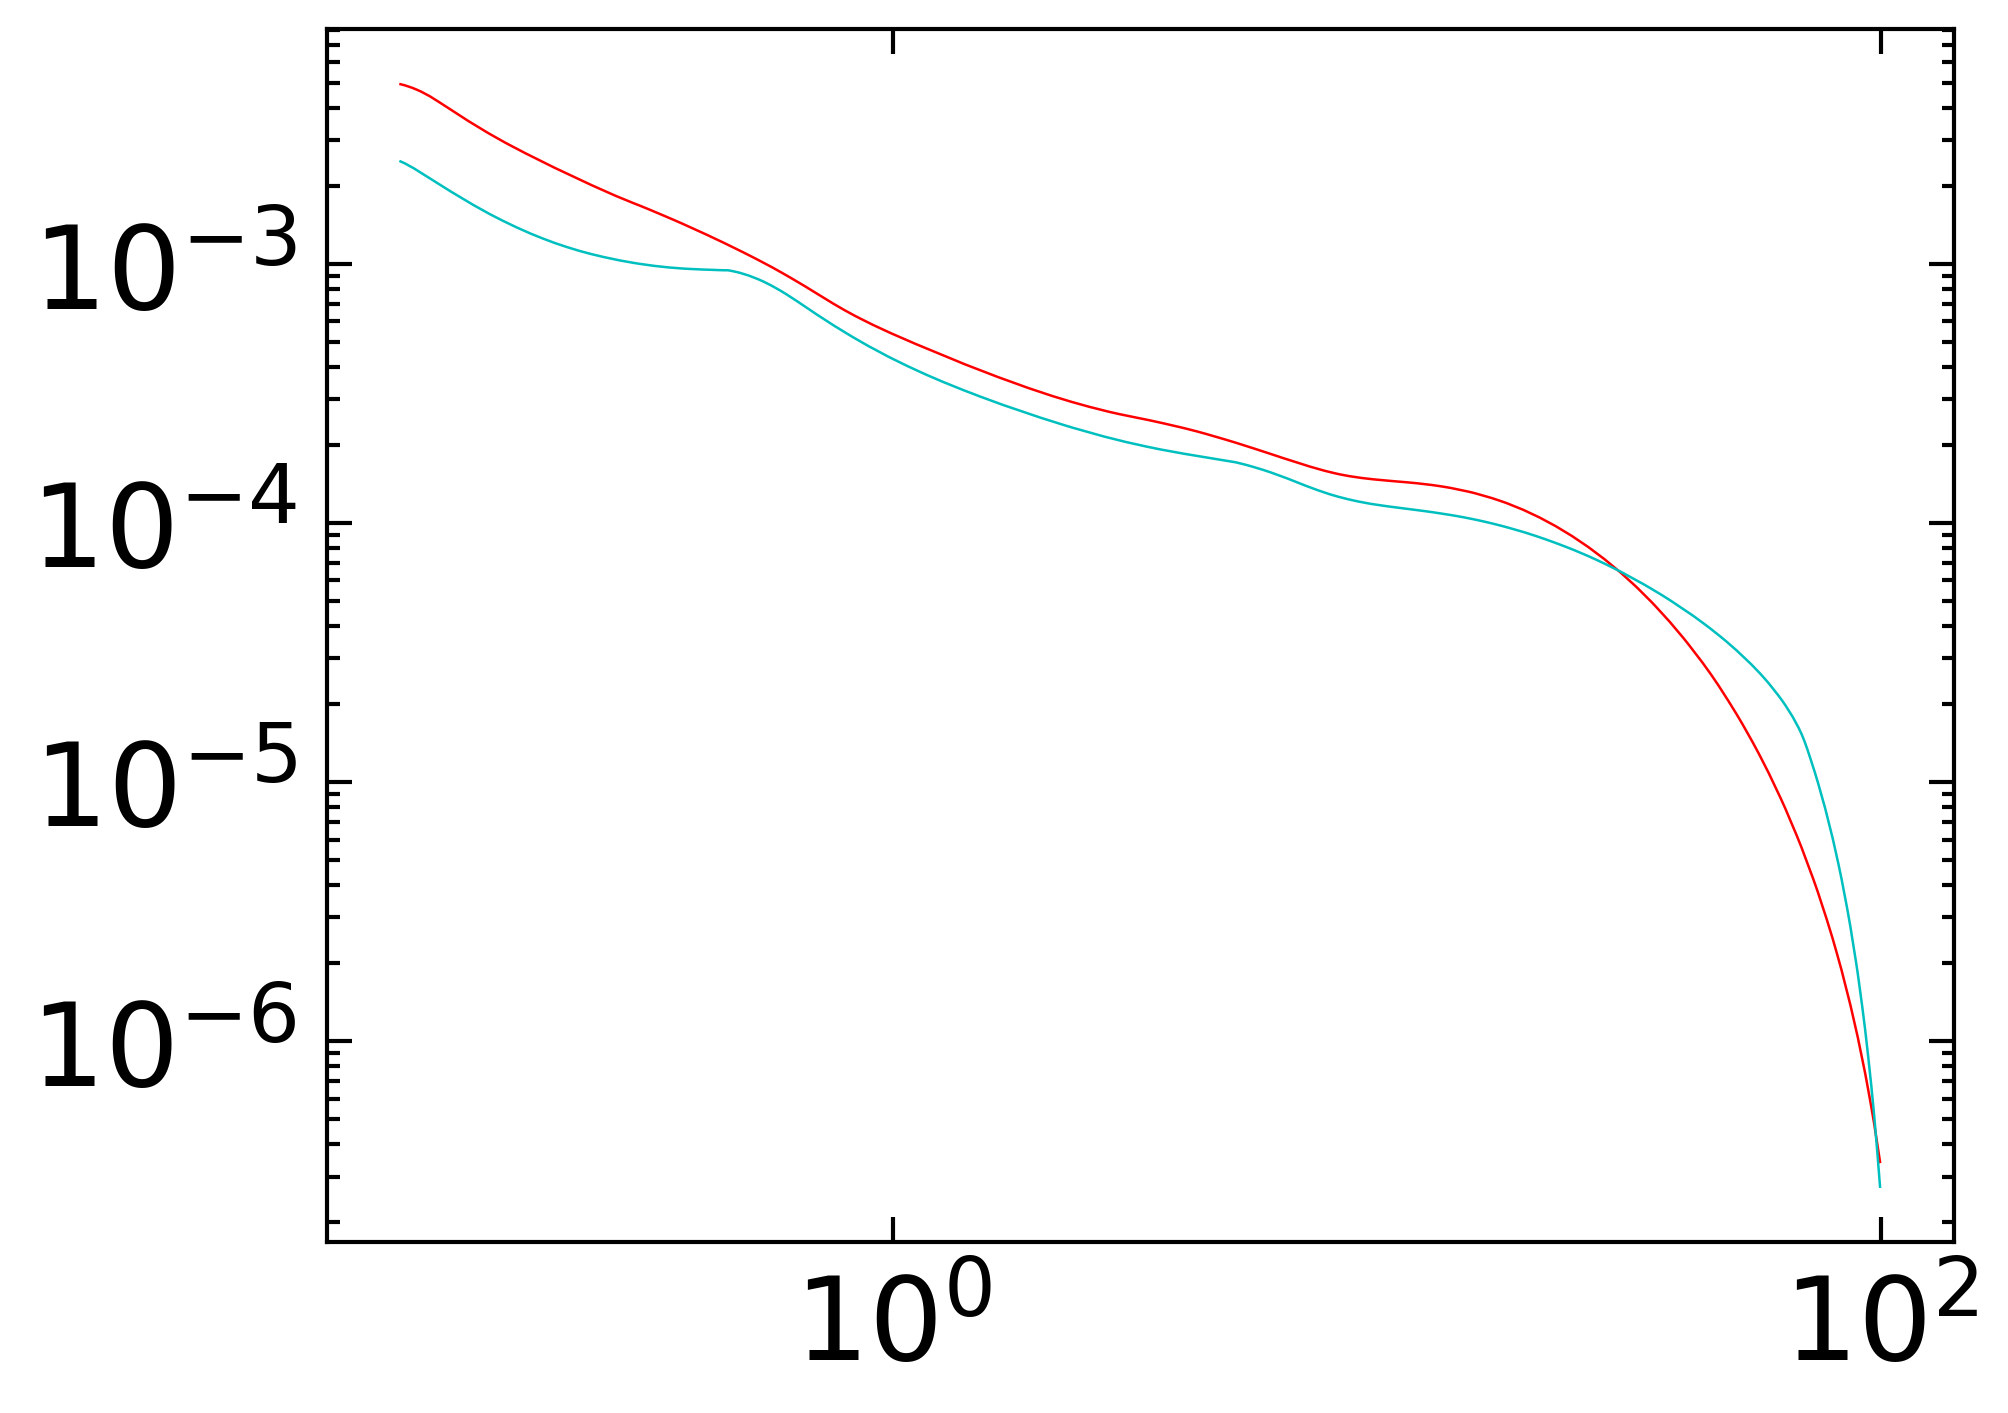

In [336]:
gamma="1.5"
dense="15"
logxi="3.7"
datype="g{}/n{}_logxi_{}".format(gamma,dense,logxi)
dtype="_g{}_n{}_logxi_{}".format(gamma,dense,logxi)
mpath=join(path,datype)
os.chdir(mpath)
Xset.restore(join(mpath,"trial3.xcm"))
Fit.query="yes"
Fit.perform()
Plot("emodel")
#check1["model"+dtype].append(Plot.model(1,plotWindow=1))
check1["xillver"+dtype]=Plot.addComp(addCompNum=1, plotWindow=1)

datype="_g{}_n{}_logxi_{}".format(gamma,dense,logxi)
plt.plot(check1["mxgrid"+datype],check1["xillver"+datype],"r-",lw=0.3,label="Reflection")
plt.plot(check1["mxgrid"+datype],check1["inject_xillver"+datype],"c-",lw=0.3,label="Injected Reflection")
#plt.plot(check1["xval"+datype][i],check1["model"+datype][i],"g-",lw=0.3)

plt.xscale("log")
plt.yscale("log")

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

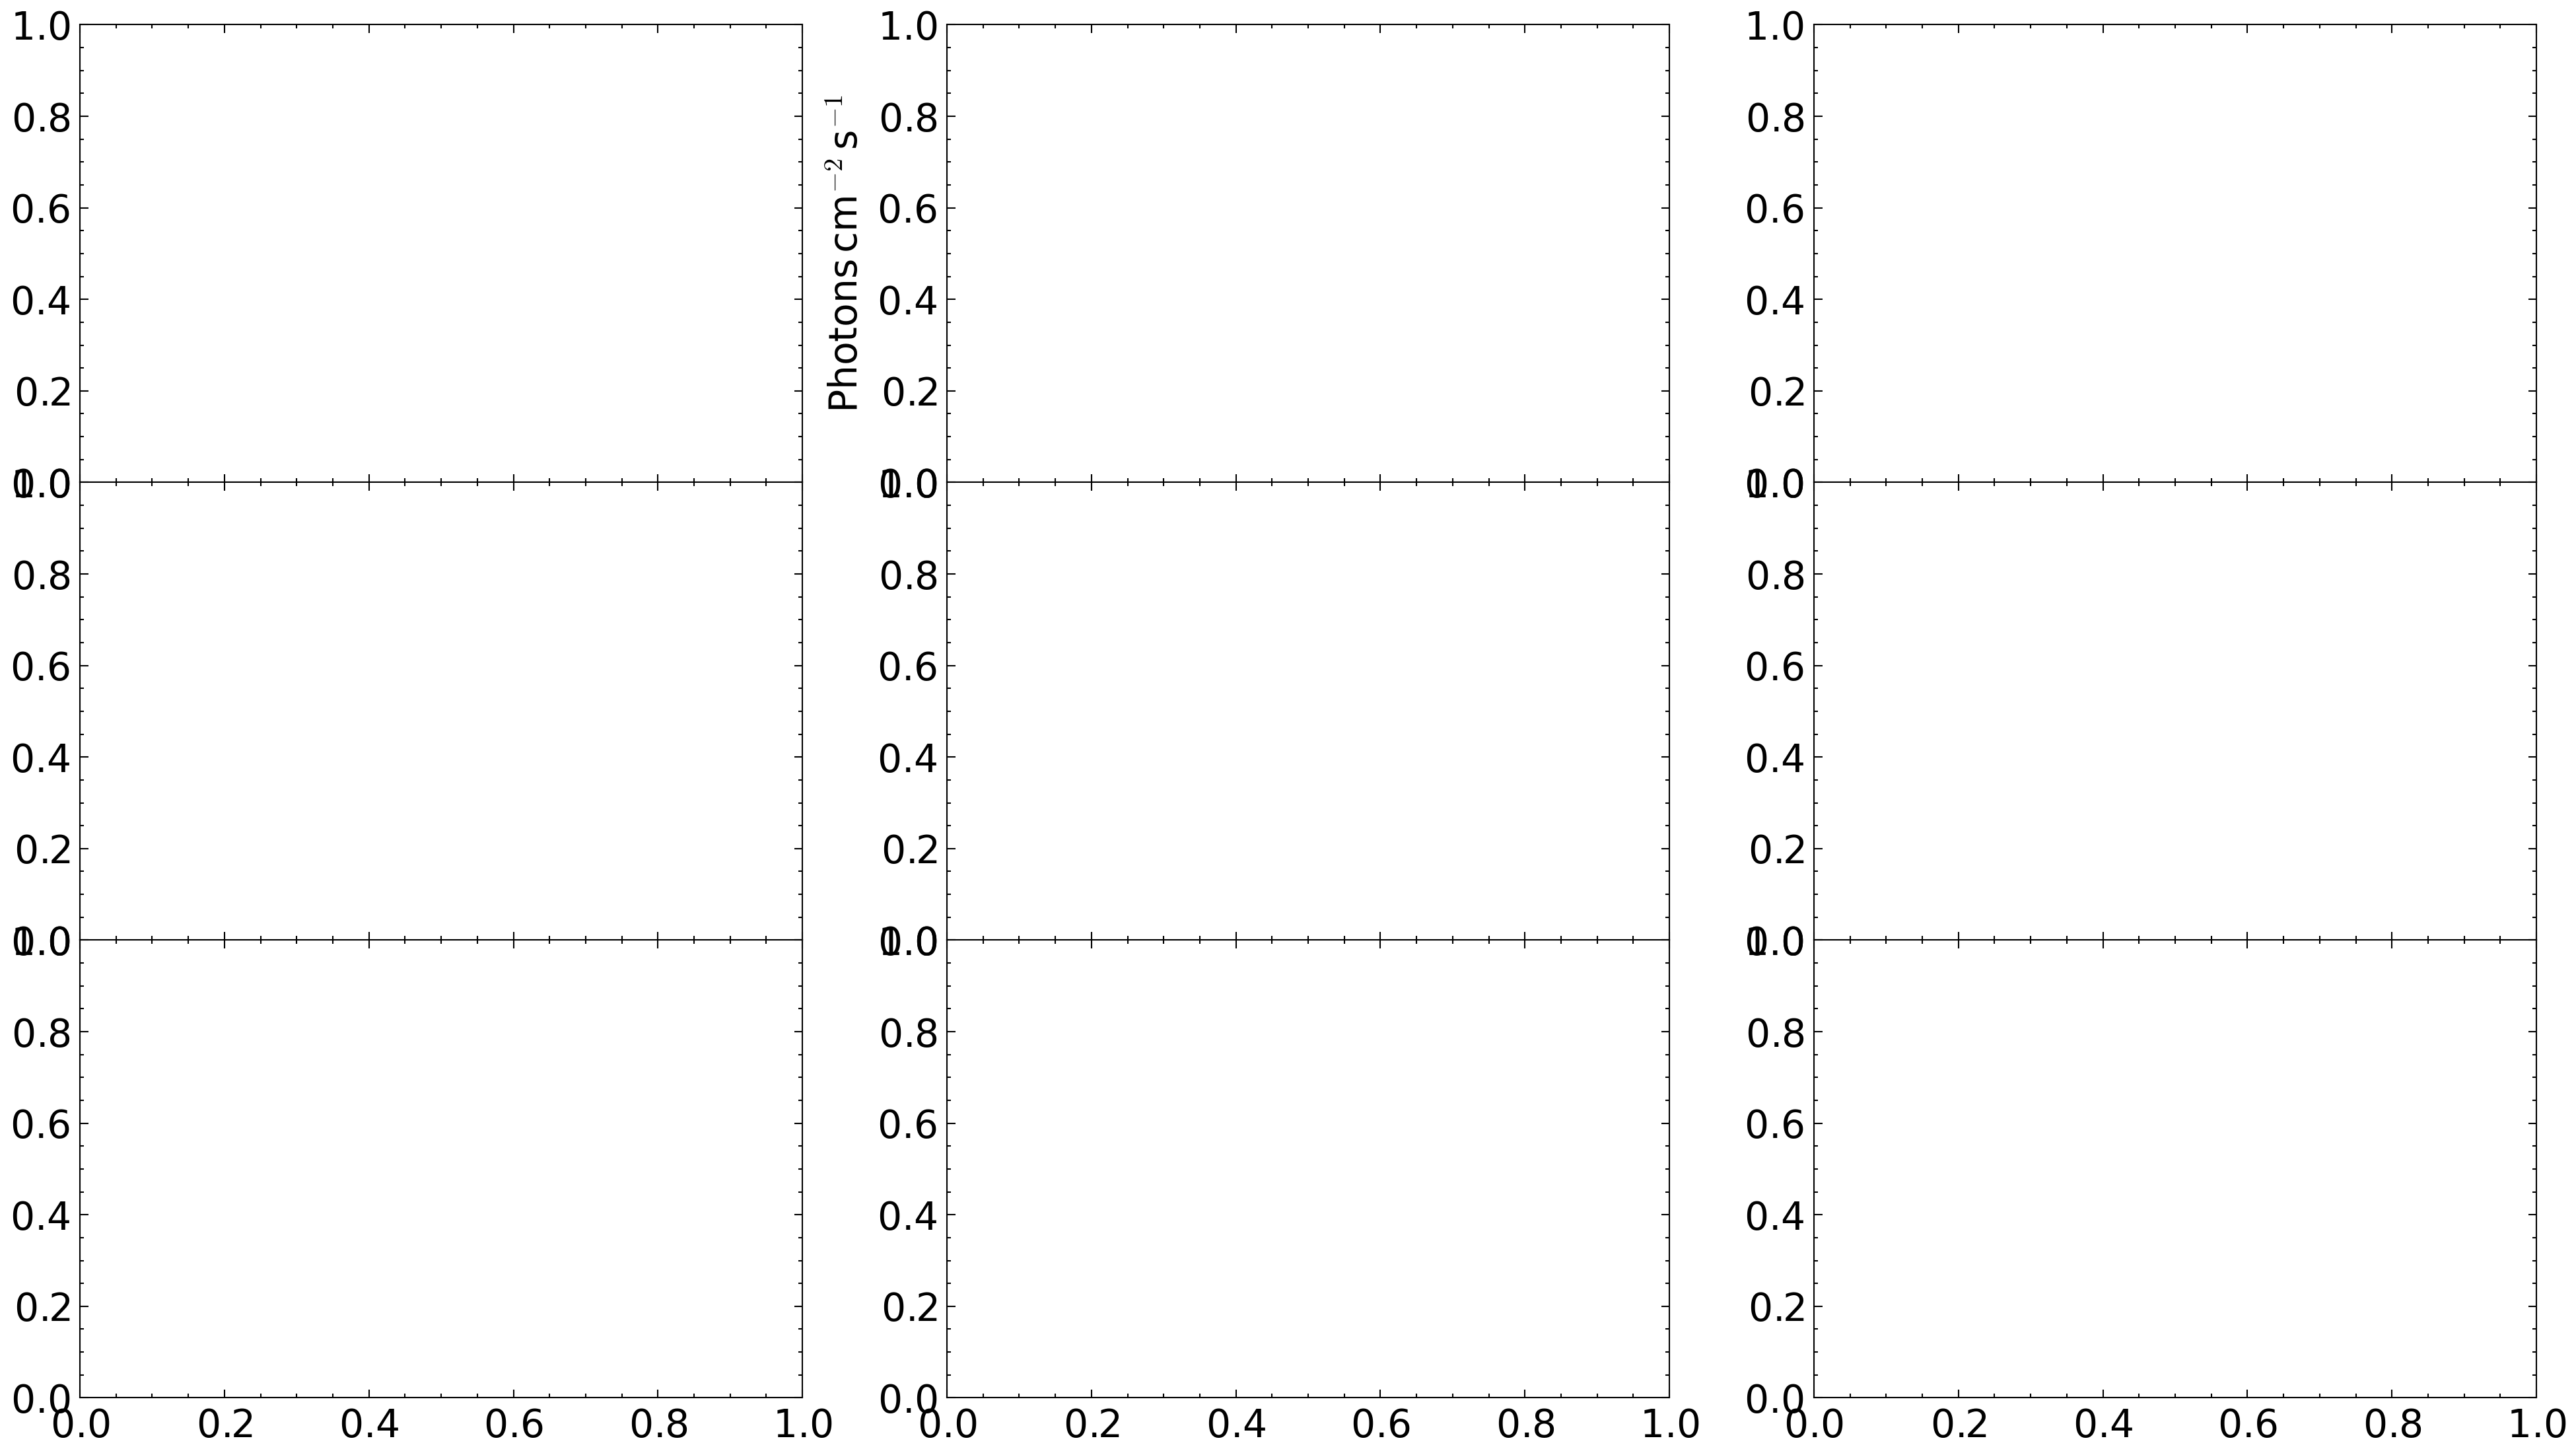

In [2]:
import scienceplots
plt.style.use(["science","no-latex"])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":14,
"legend.fancybox":True})

fig = plt.figure(figsize=(16, 9), dpi=300)
gs = fig.add_gridspec(len(xselect), len(dselect),hspace=0.0)
axs = gs.subplots(sharex=True)


gamma="1.5"
for d, dense in enumerate(dselect):
    axs[0,1].set_ylabel(r"Photons$\,$cm$^{-2}\,$s$^{-1}$")
    for k, logxi in enumerate(xselect):
        datype="_g{}_n{}_logxi_{}".format(gamma,dense,logxi)
#        axs[k].plot(check1["mxgrid"+datype],check1["xillver"+datype],"r-",lw=0.3,label="Reflection")
        axs[k].plot(check1["mxgrid"+datype],check1["inject_xillver"+datype],"c-",lw=0.3,label="Injected Reflection")
        
        for i in range(5):
            axs[k].errorbar(check1["xval"+datype][i],check1["yval"+datype][i],xerr=check1["xerr"+datype][i],yerr=check1["yerr"+datype][i],fmt="bo",mfc="none",mew=0.3,ms=2,lw=0.3)
            axs[k].plot(check1["xval"+datype][i],check1["model"+datype][i],"g-",lw=0.3)
            axs[k].text(0.05, 0.24,r"$\Gamma={}$".format(gamma),transform=axs[k].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=14)
            axs[k].text(0.05, 0.17,r"log$(n)=\,{}$".format(dense),transform=axs[k].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=14)
            axs[k].text(0.05, 0.1,r"log$(\xi)=\,{}$".format(logxi),transform=axs[k].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=14)
            axs[k].set_yscale("log")
        axs[k].legend(loc="lower right")
axs[-1].set_xlim([0.45,60])
axs[1].set_ylim([5e-4,3e-2])
axs[-1].set_xlabel("Energy (keV)")
axs[0].set_xscale("log")
fig.savefig("/disk/bifrost/yuanze/my_work/pub2/reffit_g{}.pdf".format(gamma))

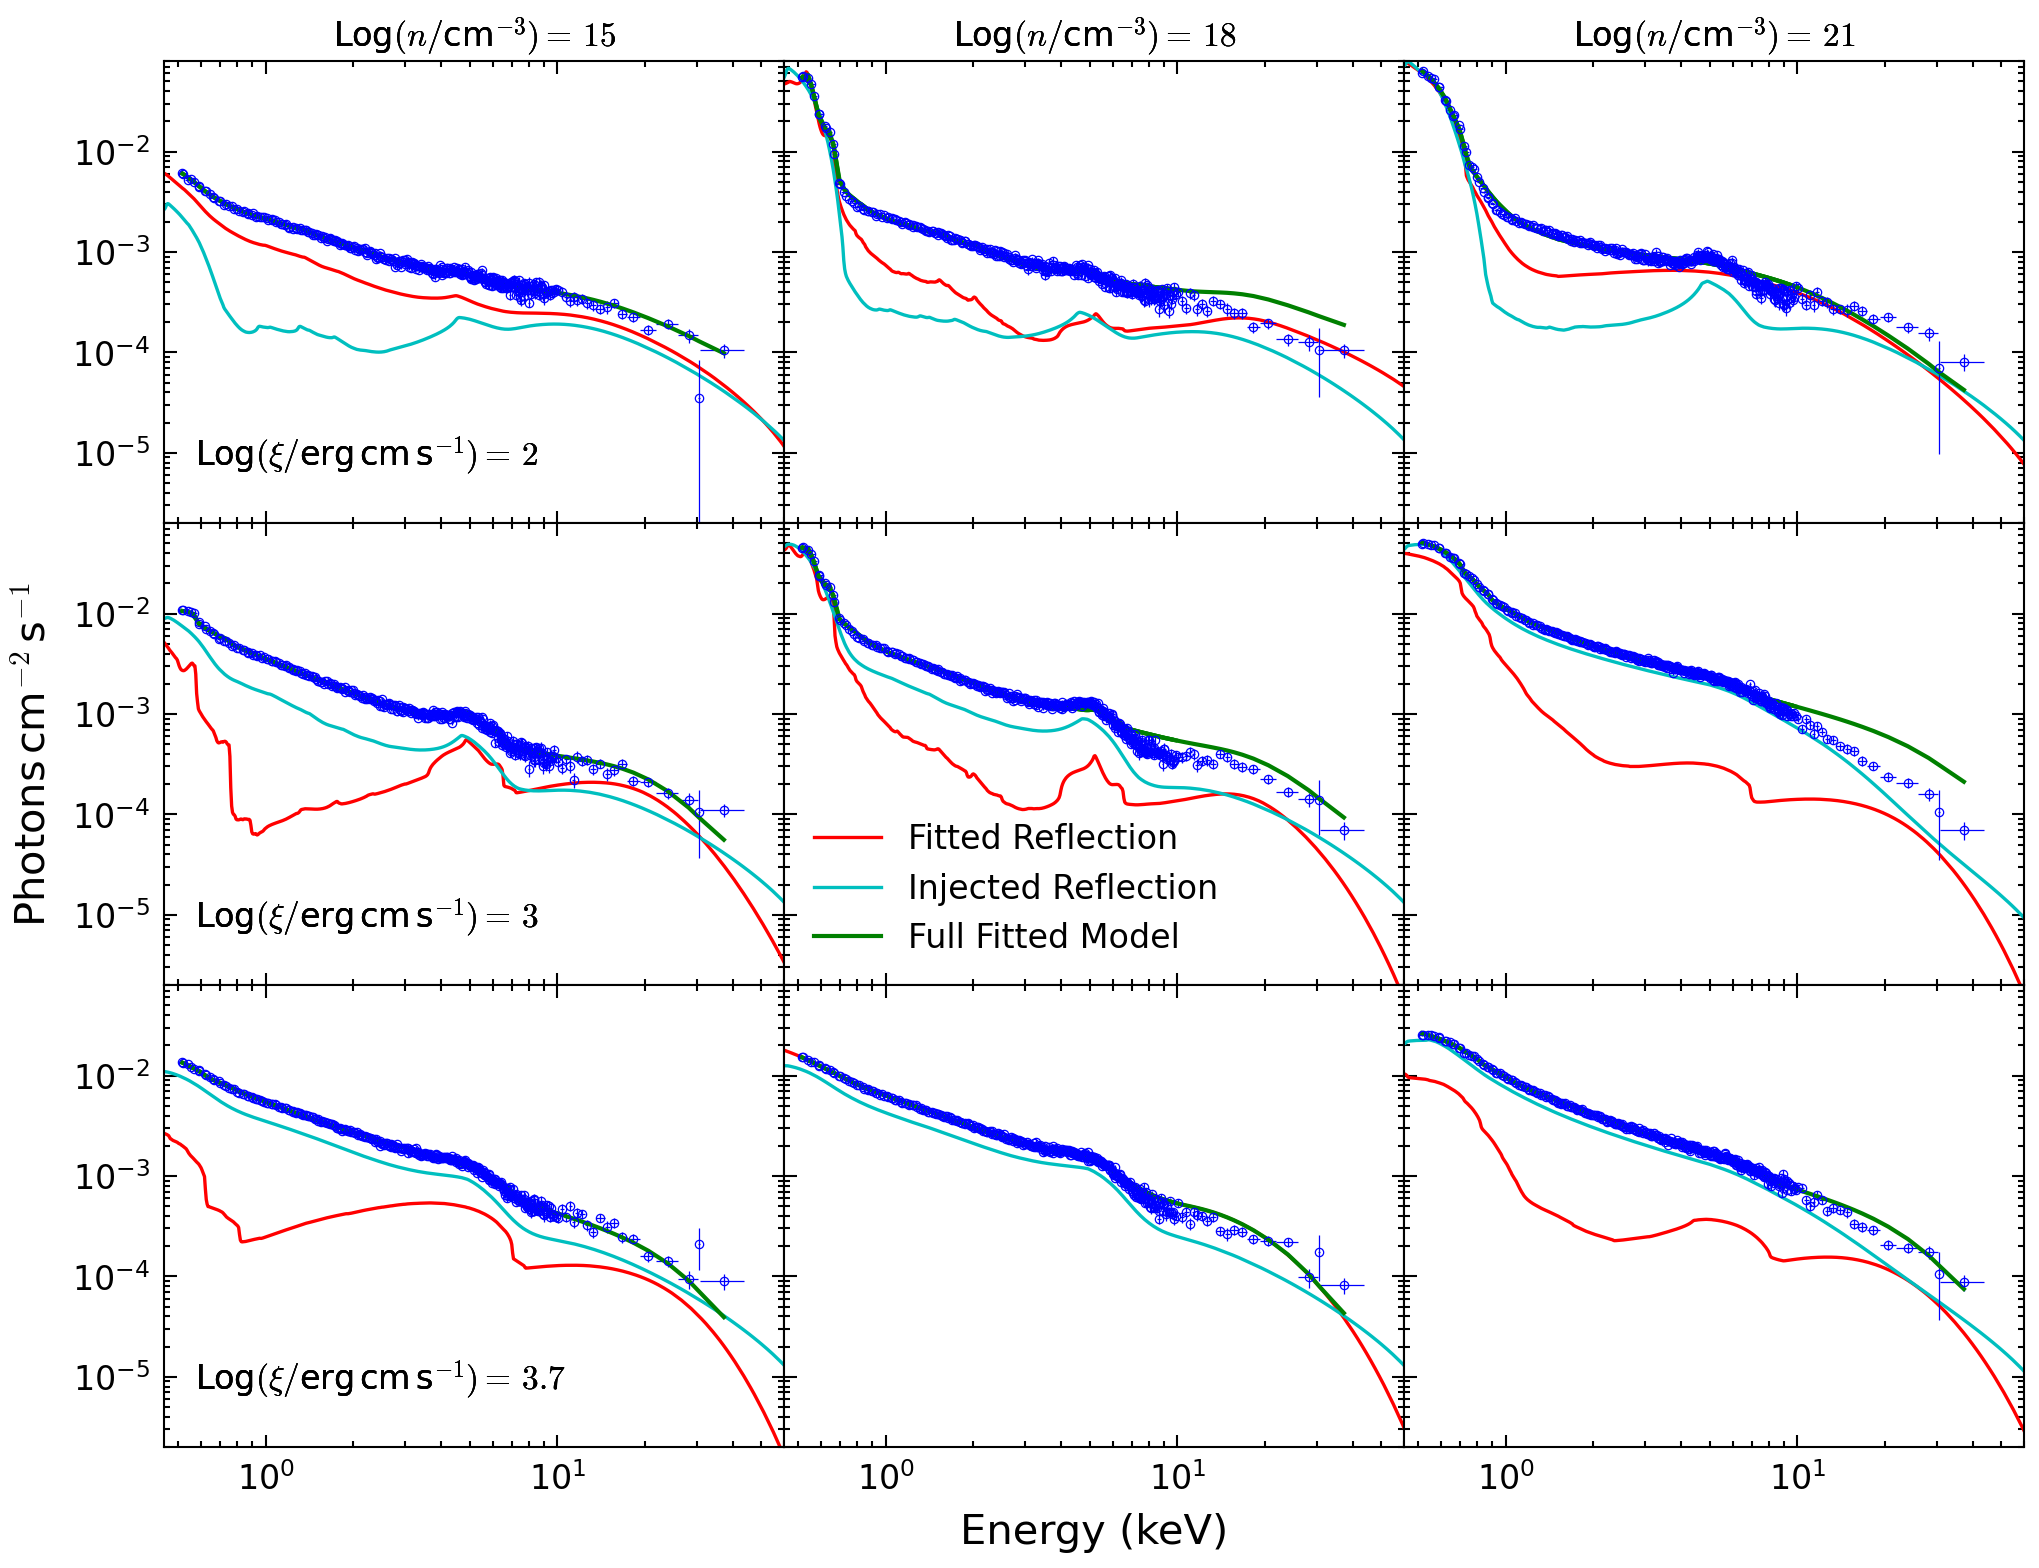

In [36]:

plt.style.use(["science","no-latex"])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":8,
"legend.fancybox":True})

fig = plt.figure(figsize=(8, 6), dpi=300)
gs = fig.add_gridspec(len(xselect), len(dselect),hspace=0.0,wspace=0.0)
axs = gs.subplots(sharex=True,sharey=True)


gamma="2"
axs[1,0].set_ylabel(r"Photons$\,$cm$^{-2}\,$s$^{-1}$",fontsize=10)
for d, dense in enumerate(dselect):
    
    for k, logxi in enumerate(xselect):
        axs[k,0].text(0.05, 0.1,r"Log$(\xi/$erg$\,$cm$\,$s$^{-1})=\,%s$"%logxi,transform=axs[k,0].transAxes,verticalalignment='bottom',horizontalalignment='left')
        datype="g{}_n{}_logxi_{}".format(gamma,dense,logxi)
        axs[k,d].plot(check1["mxgrid"+datype],check1["xillver"+datype],"r-",lw=0.8,label="Fitted Reflection")
        axs[k,d].plot(check1["mxgrid"+datype],check1["inject_xillver"+datype],"c-",lw=0.8,label="Injected Reflection")
        axs[0,d].text(0.5, 1.1,r"Log$(n/$cm$^{-3})=\,%s$"%dense,transform=axs[0,d].transAxes,verticalalignment='top',horizontalalignment='center')
        for i in range(3):
            axs[k,d].errorbar(check1["xval"+datype][i],check1["yval"+datype][i],xerr=check1["xerr"+datype][i],yerr=check1["yerr"+datype][i],fmt="bo",mfc="none",mew=0.3,ms=2,lw=0.3)
            if i == 0:
                axs[k,d].plot(check1["xval"+datype][i],check1["model"+datype][i],"g-",lw=1,label="Full Fitted Model")
            else:
                axs[k,d].plot(check1["xval"+datype][i],check1["model"+datype][i],"g-",lw=1)
            axs[k,d].set_yscale("log")

#axs[0,1].set_title(r"$\Gamma={}$".format(gamma),pad=1.5)
axs[1,1].legend(loc="lower left")
axs[-1,0].set_xlim([0.45,60])
axs[-1,0].set_ylim([2e-6,8e-2])
axs[-1,1].set_xlabel("Energy (keV)",fontsize=10)
axs[0,0].set_xscale("log")
fig.savefig("/disk/bifrost/yuanze/my_work/pub2/fit_g{}.pdf".format(gamma))

In [294]:
from astropy.table import Table, vstack
import numpy as np
from astropy import units as u
from astropy.io import fits
path='/disk/bifrost/yuanze/izw1'

dselect=np.array(["15","18","20"])
xselect=np.array(["2","3","3.7"])
gselect=np.array(["1.5","2"])
chainres={}
#parameter list for reflection parameters
refplist=["Index1__4","a__7","Incl__8","Afe__13","kTe__14","logxi__15","logN__16","Gamma__24"]

# Energies
for j, gamma in enumerate(gselect):
    for i,dense in enumerate(dselect):
        if gamma=="2.5" and dense != "15":
            continue
        if gamma=="2" and dense == "20":
            continue
        for k,logxi in enumerate(xselect):
            # Define chain location
            if gamma=="2":
                datype="g{0}/n{1}_logxi_{2}/a9i41n{1}logxi{2}.chain".format(gamma,dense,logxi)
            else:
                datype="g{0}/n{1}_logxi_{2}/a9i41n{1}logxi{2}_rev.chain".format(gamma,dense,logxi)
            mpath=join(path,datype)
            #read table
            fblf= Table.read(join(path,datype),hdu=1)
            #convert to pandas
            df= fblf.to_pandas()
            #get parameter chains
            ref1=df[refplist]
            #flux1=df[["lg10Flux__3","lg10Flux__23"]]
            #extracting central 80%
            ref1q=np.quantile(ref1.to_numpy(),[0.84,0.16],axis=0)
            #extracting mean
            ref1b=np.quantile(ref1.to_numpy(),0.5,axis=0)
            #extracting upper and lower quantile points
            ref1erup=np.max([ref1q[1],ref1q[0]],axis=0)
            ref1erlow=np.min([ref1q[1],ref1q[0]],axis=0)
            chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)]=ref1b
            chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)]=ref1erup
            chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)]=ref1erlow

In [42]:
print([ref1q[1],ref1q[0]])
print(np.max([ref1q[1],ref1q[0]],axis=0))

[array([-8.21448609e+00, -8.33203710e-01,  1.75001770e+01,  5.00000000e-01,
        4.00000000e+02,  1.15744989e-02,  1.53447298e+01,  1.98722312e+00]), array([8.06267123e+00, 7.97399718e-01, 6.76294372e+01, 5.00000000e-01,
       4.00000000e+02, 3.06129276e-01, 1.68985485e+01, 2.00350166e+00])]
[8.06267123e+00 7.97399718e-01 6.76294372e+01 5.00000000e-01
 4.00000000e+02 3.06129276e-01 1.68985485e+01 2.00350166e+00]


g2_n15_logxi_2
g2_n15_logxi_3
g2_n15_logxi_3.7
g2_n18_logxi_2
g2_n18_logxi_3
g2_n18_logxi_3.7
g1.5_n15_logxi_2
g1.5_n15_logxi_3
g1.5_n15_logxi_3.7
g1.5_n18_logxi_2
g1.5_n18_logxi_3
g1.5_n18_logxi_3.7
g1.5_n20_logxi_2
g1.5_n20_logxi_3
g1.5_n20_logxi_3.7


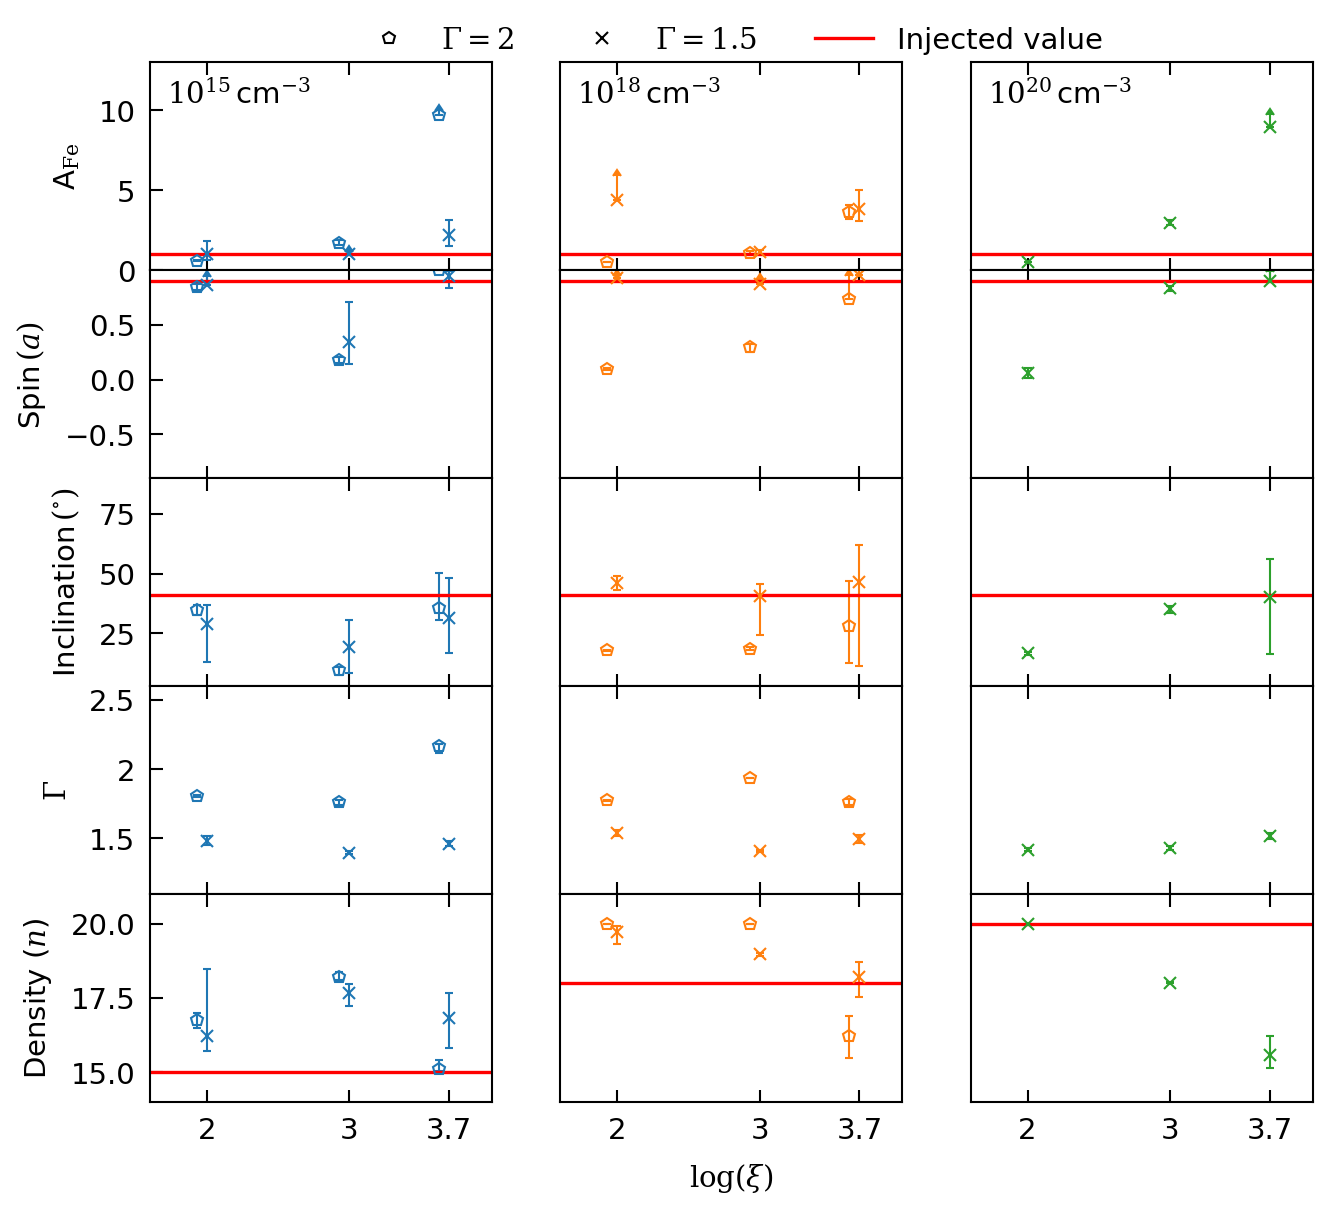

In [305]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import scienceplots
import matplotlib.ticker as ticker

plt.style.use(["science","no-latex","ieee"])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

cdic=mcolors.TABLEAU_COLORS
colors=list(cdic.values())
markers = ['p',"x","o"]

def jitter(x, amount=0.07):
    return np.float64(x) + amount

#np.random.uniform(-amount, amount, size=1)
ncols=3
nrows=5
fig = plt.figure(figsize=(nrows,1.5*ncols),dpi=300)
gs = fig.add_gridspec(nrows,ncols, hspace=0)
axs=gs.subplots(sharex=True)
lines=[]
capsize=1
ms=3
capthick=1
mew=0.5
#dselect=np.array(["15","18","20"])
#xselect=np.array(["2","3","3.7"])
#gselect=np.array(["1.5","2"])
alims=["g2_n15_logxi_3.7","g2_n18_logxi_3.7","g1.5_n15_logxi_2","g1.5_n18_logxi_3.7","g1.5_n18_logxi_2","g1.5_n18_logxi_3","g1.5_n18_logxi_3.7","g1.5_n20_logxi_3.7"]
Afelims=["g1.5_n20_logxi_3.7","g1.5_n15_logxi_3","g1.5_n18_logxi_2","g2_n15_logxi_3.7",]
for j, gamma in enumerate(gselect):
    for i,dense in enumerate(dselect):
        if gamma=="2.5" and dense != "15":
            continue
        if gamma=="2" and dense == "20":
            continue
        for k,logxi in enumerate(xselect):
            # Define chain location
            
            ab=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][1]
            aup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][1]
            alow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][1]
            
            Inclb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][2]
            Inclup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][2]
            Incllow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][2]
            
            Afeb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
            Afeup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
            Afelow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
            
            gammab=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][7]
            gammaup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][7]
            gammalow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][7]
            
            logNb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][6]
            logNup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][6]
            logNlow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][6]
            dtype="g{}_n{}_logxi_{}".format(gamma,dense,logxi)
            print(dtype)
            #Deciding whether to treat results as upper/lower-limits
            if dtype in alims:
                alolims=True
            else:
                alolims=False
            Afeuplims=False
            Afelolims=False
            if dtype in Afelims:
                Afelolims=True
            else:
                
                Afelolims=False
            axs[0,i].errorbar(jitter(logxi,amount=0.07*(j-1)),Afeb,yerr=np.vstack([Afeb-Afelow,Afeup-Afeb]),lolims=Afelolims,uplims=Afeuplims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[1,i].errorbar(jitter(logxi,amount=0.07*(j-1)),ab,yerr=np.vstack([ab-alow,aup-ab]),lolims=alolims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[2,i].errorbar(jitter(logxi,amount=0.07*(j-1)),Inclb,yerr=np.vstack([Inclb-Incllow,Inclup-Inclb]),lolims=Incllolims,uplims=Incluplims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[3,i].errorbar(jitter(logxi,amount=0.07*(j-1)),gammab,yerr=np.vstack([gammab-gammalow,gammaup-gammab]),fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[4,i].errorbar(jitter(logxi,amount=0.07*(j-1)),logNb,yerr=np.vstack([logNb-logNlow,logNup-logNb]),fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)

            
for j, gamma in enumerate(gselect):
    proxy_line1 = Line2D([], [], marker=markers[j],fillstyle="none", color="k", label=r"$\Gamma={}$".format(gamma),ms=ms,lw=0,mew=mew)
    lines.append(proxy_line1)
for i,dense in enumerate(dselect):
    axs[2,i].set_xticks([2,3,3.7])
    axs[2,i].set_xticklabels(["2","3","3.7"])
    axs[3,i].set_yticks([1.5,2,2.5])
    axs[3,i].set_yticklabels(["1.5","2","2.5"])
    axs[0,i].text(0.05,0.8,r"$10^{%s}\,$cm$^{-3}$"%dense,transform=axs[0,i].transAxes)
    
    axs[0,i].set_ylim([0,13])
    axs[1,i].set_ylim([-0.9,0.999])
    axs[2,i].set_ylim([3,90])
    axs[3,i].set_ylim([1.1,2.6])
    axs[4,i].set_ylim([14,21])
    
    if i!=0:
        axs[0,i].set_yticks([])
        axs[1,i].set_yticks([])
        axs[2,i].set_yticks([])
        axs[3,i].set_yticks([])
        axs[4,i].set_yticks([])
    axs[0,i].axhline(y=1.0,color="r",lw=0.8)
    axs[1,i].axhline(y=0.9,color="r",lw=0.8)
    axs[2,i].axhline(y=41,color="r",lw=0.8)
    axs[4,i].axhline(y=int(dense),color="r",lw=0.8)
#    proxy_line2 = Line2D([], [], color=colors[i],fillstyle="none", label=r"$n=10^{%s}$"%dense,ms=ms,lw=0.5,mew=mew)
#    lines.append(proxy_line2)
proxy_line2 = Line2D([], [], color="r",fillstyle="none", label=r"Injected value",ms=ms,lw=0.8,mew=mew)
lines.append(proxy_line2)
# proxy line creation

labels=[l.get_label() for l in lines]
labelsize=7

#Ticks set-up
axs[2,0].set_xlim([1.6,4])
axs[2,0].xaxis.set_minor_locator(ticker.NullLocator())



#axs[4,0].set_yticks([15,16,17,18,19,20])
#axs[4,0].set_yticklabels(["15","16","17","18","19","20"])

axs[0,1].legend(lines,labels,fontsize=labelsize,ncol=5,loc='upper center',bbox_to_anchor=(0.5,1.3))

for par in range(nrows):
    axs[par,0].yaxis.set_minor_locator(ticker.NullLocator())
    axs[par,0].tick_params(right=False)


axs[0,0].set_ylabel(r"A$_\mathrm{Fe}$",fontsize=labelsize)
axs[1,0].set_ylabel(r"Spin$\,(a)$",fontsize=labelsize)
axs[2,0].set_ylabel(r"Inclination$\,(^{\circ})$",fontsize=labelsize)
axs[3,0].set_ylabel(r"$\Gamma$",fontsize=labelsize)
axs[4,0].set_ylabel(r"Density ($n$)",fontsize=labelsize)
axs[-1,1].set_xlabel(r"$\log(\xi)$",fontsize=labelsize)

#plt.tight_layout()

fig.savefig("/disk/bifrost/yuanze/my_work/pub/parameter1.pdf")




In [121]:
#100 mCrab
#only with GR reflection
#maybe exclude spin, consider only gamma, inclination, Afe density
import matplotlib.colors as mcolors
dense="20"
gamma="1.5"
logxi="3.7"
ab=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][1]
aup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][1]
alow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][1]
Afeb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
Afeup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
Afelow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]

In [150]:
print(aup)
print(alow)
print(ab)

0.9977381529862701
0.9950967575895237
0.996918175774572


In [302]:
#May 27 15:19, adding extra 3M ite for g1.5n18
#May 27 18:20, adding extra 3M ite for g1.5n20
#May 29 11:13, adding extra 3M ite for g2.5n15
#May 29 11:13, adding extra 3M ite for g2n20
#May 29 15:43, adding extra 3M ite for g1.5n15
#May 29 15:43, adding extra 3M ite for g2n15, g2n15logxi3 is missing 3M
#May 29 20:35, adding extra 3M ite for g2n18
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
import numpy as np
from astropy.io import fits
import corner
import scienceplots
from os.path import join
path='/disk/bifrost/yuanze/izw1'
plt.style.use(["science","no-latex"])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":12,
"legend.fancybox":True})
refplist=["Index1__4","a__7","Incl__8","Afe__13","kTe__14","logxi__15","logN__16","Gamma__24"]
rangespec=[(-10,10),(-1,1),(1,90),(0.5,10),(0,400),(0,4),(15,20),(1.2,2.5)]
gselect=np.array(["2","1.5"])
for j, gamma in enumerate(gselect):
    for i,dense in enumerate(dselect):
        if gamma=="2.5" and dense != "15":
            continue
        if gamma=="2" and dense == "20":
            continue
        for k,logxi in enumerate(xselect):
            if gamma=="2":
                datype="g{0}/n{1}_logxi_{2}/a9i41n{1}logxi{2}.chain".format(gamma,dense,logxi)
            else:
                datype="g{0}/n{1}_logxi_{2}/a9i41n{1}logxi{2}_rev.chain".format(gamma,dense,logxi)
            mpath=join(path,datype)
            #read table
            fblf= Table.read(join(path,datype),hdu=1)
            df= fblf.to_pandas()
            #get parameter chains
            ref1=df[refplist]

            fig=corner.corner(ref1,quantiles=[0.16,0.84],\
                              labels=refplist,range=rangespec\
                              ,plot_datapoints=False,show_titles=False,title_kwargs={"fontsize": 12})
            fig.savefig("/disk/bifrost/yuanze/my_work/corner/g{0}_n{1}_logxi_{2}_a9i41n{1}logxi{2}.png".format(gamma,dense,logxi))
            plt.close()

In [294]:
print([ab-alow,aup-ab])
print(ab)
aup=np.max([aup,alow])
print(aup)
alow
print(alow)


[-0.024926189922306677, -0.8192799640141688]
-0.006857266563009903
0.018068923359296774
0.018068923359296774


In [161]:
parval=np.zeros([4,3])


parval[0,0] = 1e15
parval[1,0] = 1e18
parval[2,0] = 1e20

parval[0,1] = 1.5
parval[1,1] = 2
parval[2,1] = 2.5
parval[3,1] = 2.7

parval[0,2] = 2
parval[1,2] = 3
parval[2,2] = 3.7



intntb=[3,4,3]
nintpm=3

In [175]:
path='/disk/bifrost/yuanze/izw1'
Xset.restore(path+'/g2/n15_logxi_3/trial2.xcm')
AllModels.setEnergies(".1 100. 1000 log")

Fit.show()
Fit.query='yes'
Fit.nIterations=1000


***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/g2/n15_logxi_3/trial2.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? Number of trials exceeded: continue fitting? 

In [176]:
Fit.perform()

In [178]:
Xset.chatter = 10
Fit.show()


Fit statistic  : C-Statistic                  139.66     using 154 bins, spectrum 1, group 1.
                 C-Statistic                  172.45     using 154 bins, spectrum 2, group 2.
                 C-Statistic                   82.10     using 45 bins, spectrum 3, group 3.
Total fit statistic                           394.20     with 344 d.o.f.

Test statistic : Chi-Squared                  404.85     using 353 bins.
 Null hypothesis probability of 1.32e-02 with 344 degrees of freedom
